In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt, style
pd.set_option('display.max_rows', None)
style.use('ggplot')

In [2]:
# Read dataset into a dataframe
df = pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check for NaN values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Check for any 0 values in the columns listed in 'cols' by listing the unique values of each
# Since 0 does not make sense for these values they should be treated as NaN values
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in cols:
    print(i,':',df[i].unique())
    print('###########################################################################')

Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
###########################################################################
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
###########################################################################
SkinThickness : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 

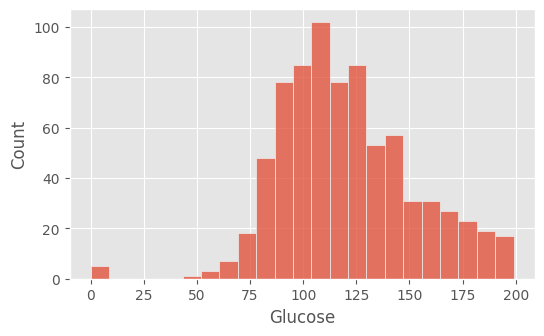

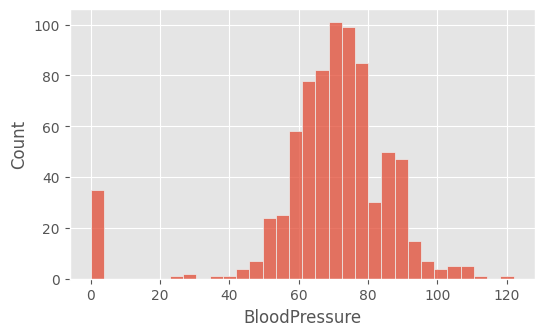

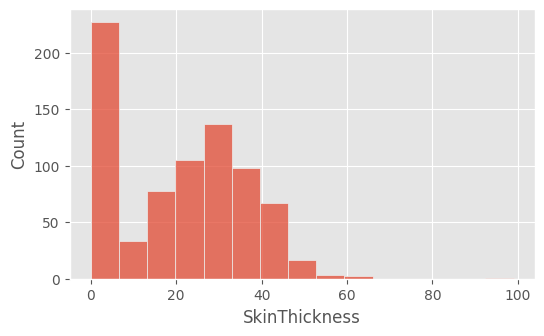

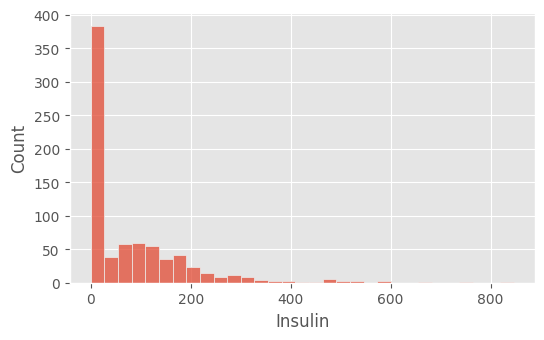

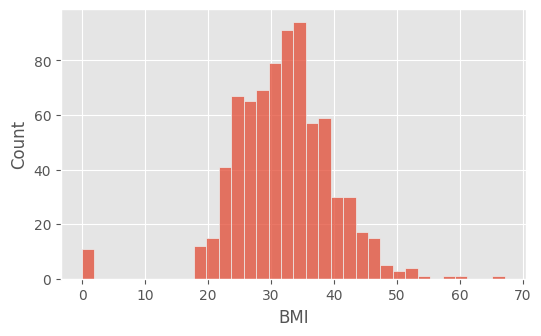

In [5]:
# Visualize the columns using Histograms
for i in cols:
    plt.figure(figsize=(6,3.5))
    sns.histplot(df[i])
    plt.show()

In [6]:
# Replace all the 0s in cols with a NaN value for data preprocessing
for i in cols:
    df[i].replace(0, np.nan, inplace=True)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
#Check for NaN values in dataframe and calculate % of values that are NaN
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df.isna().sum()*100/df.shape[0]

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [10]:
# Treat missing values: Drop rows with NaN values for Glucose, BloodPressure, and BMI
# Replace NaN values for Skin Thickness and Insulin with median values
df.dropna(subset=['Glucose','BloodPressure','BMI'], inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.5,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
# Create a second dataframe with Insulin dropped due to too many missing values
df2 = df.drop(columns='Insulin')

In [13]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [14]:
df.shape

(724, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             724 non-null    float64
 4   Insulin                   724 non-null    float64
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.6 KB


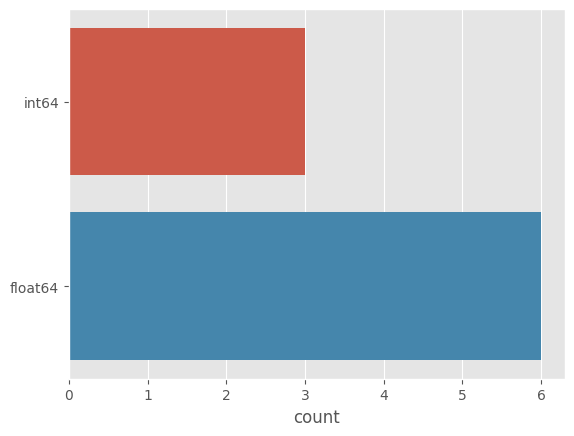

In [16]:
# Create a countplot of all the datatypes for the variables in the dataset
sns.countplot(y=df.dtypes, data=df)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Outcome'>

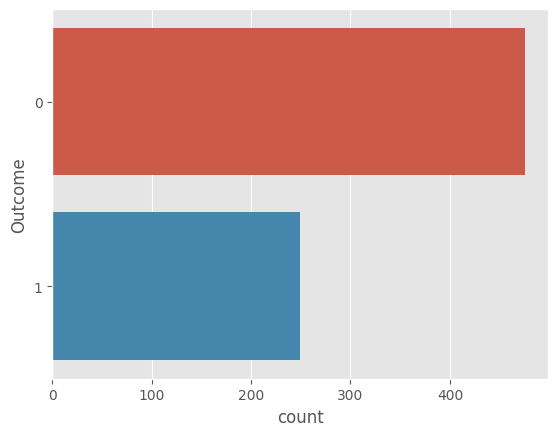

In [17]:
# Create a countplot to view the frequency of the 2 outcomes in the dataset
sns.countplot(y='Outcome', data=df)

The following countplot shows that there are about twice as many non-diabetic patients than diabetic patients in this dataset. The next course of action will be to see if there is any strong correlation between any of the features and the outcome

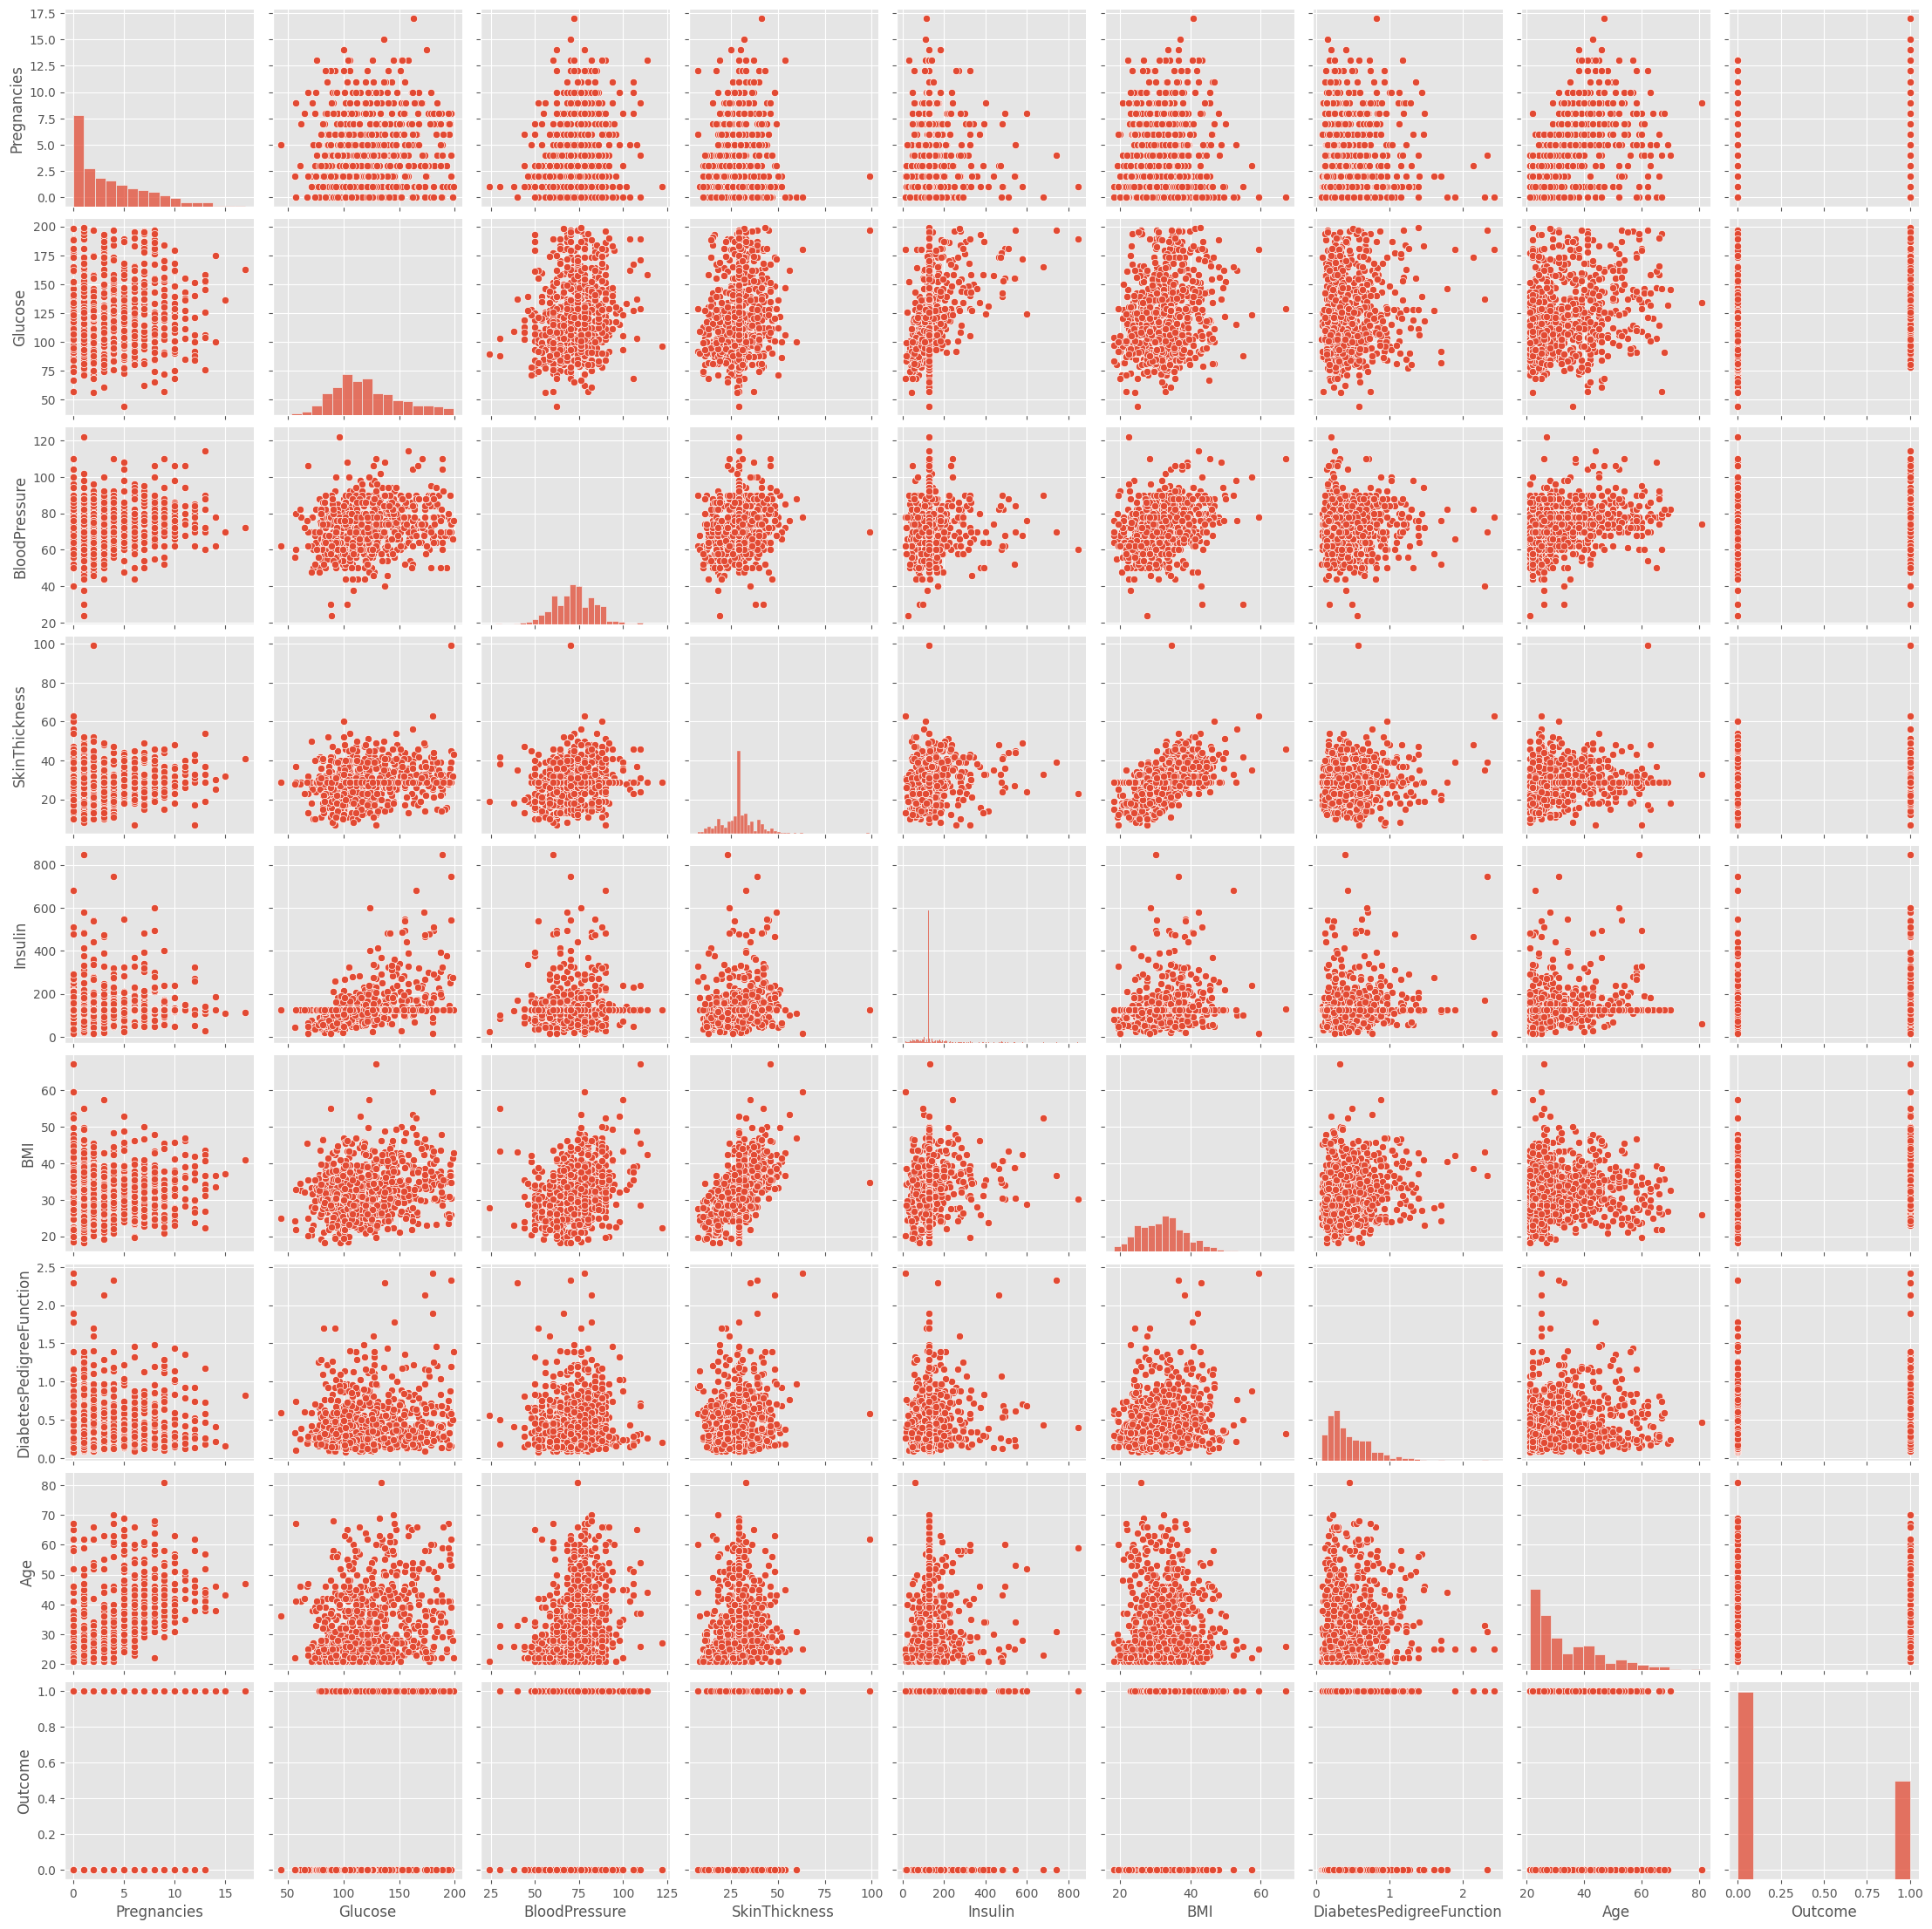

In [18]:
# Create a pairplot to view all the data in the form of scatter plots and histograms
sns.pairplot(df)

There doesn't appear to be many very strong trends betweeen the various measures in the dataset. But there appears to be a mild correlation between BMI and Skin Thickness, BMI and Outcome, Glucose and Outcome, and Age and Pregnancies. This may impact how accurate the model will be.

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.133978,142.044199,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.019267,88.713438,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.500000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

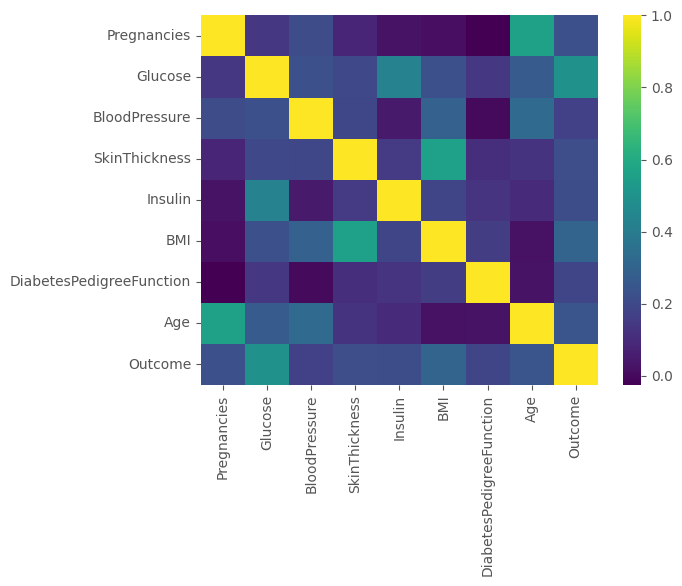

In [20]:
# Correlation analysis with a heatmap and a correlation matrix
sns.heatmap(df.corr(), cmap='viridis')

In [21]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.078710,0.023269,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.195340,0.427117,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.191570,0.045832,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.078710,0.195340,0.191570,1.000000,0.154145,0.555098,0.106670,0.124268,0.216357
Insulin,0.023269,0.427117,0.045832,0.154145,1.000000,0.184102,0.129494,0.096894,0.211736
BMI,0.012342,0.223276,0.287403,0.555098,0.184102,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.106670,0.129494,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.124268,0.096894,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.216357,0.211736,0.299375,0.184947,0.245741,1.000000


In [22]:
# T-test to validate the signifance in the difference of mean glucose levels in diabetic and non-diabetic patients
# H0: mean_0 = mean_1 where 0 is non-diabetic, and 1 is diabetic
df['Outcome'].unique()

array([1, 0])

In [23]:
df.groupby('Outcome')['Glucose'].mean()

Outcome
0    111.016842
1    142.610442
Name: Glucose, dtype: float64

In [24]:
glu_0 = df[df.Outcome==0]['Glucose']
glu_1 = df[df.Outcome==1]['Glucose']

In [25]:
from scipy.stats import ttest_ind
ttest_ind(glu_0,glu_1)

Ttest_indResult(statistic=-15.038368254878621, pvalue=1.1501695251993079e-44)

With a p-value well below 0.05, we reject the null hypothesis H0

For the model building process we will use a variety of common classification models to fit the training data and compare the results from the test data to see if any of the models perform better than KNN. The X data will also have to be scaled due to different orders of magnitude between features. Finally we will also do model building on both df (which has insulin data) and df2 (which does not have insulin data).

In [26]:
# Import and define various classification models and import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
lr= LogisticRegression()
KNN = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
svec = SVC()

In [27]:
# Split data into X and Y parts
# We will be training models based on the data with Insulin (X) and the data without insulin (X2)
X = df.drop(columns=['Outcome'])
X2 = df2.drop(columns=['Outcome'])

In [28]:
Y = df['Outcome']
print(X.shape)
print(Y.shape)
print(X2.shape)

(724, 8)
(724,)
(724, 7)


In [29]:
# Split the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size=0.3, random_state=0)

In [30]:
# Import scaler objects and create a simple scaler function that converts train/test inputs into scaled versions
# Use .fit_transform method for the training data and .transform for the test data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [31]:
def scaler(kind, X_train, X_test):
    sc = kind()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    return X_train_sc, X_test_sc

In [32]:
# Apply the scaler function to X (with Insulin) and X2 (without Insulin)
X_train_sc, X_test_sc = scaler(StandardScaler, X_train, X_test)
X2_train_sc, X2_test_sc = scaler(StandardScaler, X2_train, X2_test)

In [33]:
# Create a model function that takes in a model type and train/test data and performs the following actions:
# -Fits the model to the train data and using the X_test to predict and output Y_pred
# -Creates a confusion matrix to display the true negatives, false positives, false negatives, and true positives
# -Uses the confusion matrix to calculate the accuracy, precision, sensitivity (or recall), and specificity of the model
# -Plots the ROC curve and calculates the AUC, which will be compared between models to determine the best one.
def model(kind, X_train, X_test, Y_train, Y_test):
    kind.fit(X_train, Y_train)
    Y_pred = kind.predict(X_test)
    
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(cm)
    accuracy = metrics.accuracy_score(Y_test, Y_pred) 
    print("Accuracy score:",accuracy)
    precision = metrics.precision_score(Y_test, Y_pred) 
    print("Precision score:",precision)
    recall = metrics.recall_score(Y_test, Y_pred) 
    print("Sensitivity score:",recall)
    specificity = tn/(tn+fp)
    print("Specificity score:",specificity)
    
    fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
    auc_calc = auc(fpr, tpr)
    
    plt.figure(figsize=(3, 3), dpi=100)
    plt.plot(fpr, tpr, linestyle='-', label='auc = %0.3f' % auc_calc)

    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
    

[[116  28]
 [ 25  49]]
Accuracy score: 0.7568807339449541
Precision score: 0.6363636363636364
Sensitivity score: 0.6621621621621622
Specificity score: 0.8055555555555556


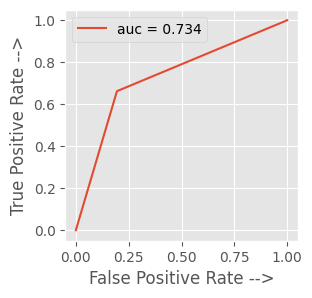

[[110  34]
 [ 34  40]]
Accuracy score: 0.6880733944954128
Precision score: 0.5405405405405406
Sensitivity score: 0.5405405405405406
Specificity score: 0.7638888888888888


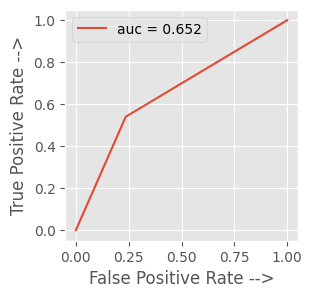

[[107  37]
 [ 28  46]]
Accuracy score: 0.7018348623853211
Precision score: 0.5542168674698795
Sensitivity score: 0.6216216216216216
Specificity score: 0.7430555555555556


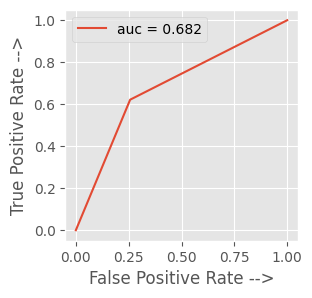

[[119  25]
 [ 26  48]]
Accuracy score: 0.7660550458715596
Precision score: 0.6575342465753424
Sensitivity score: 0.6486486486486487
Specificity score: 0.8263888888888888


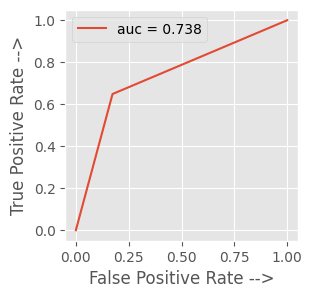

[[111  33]
 [ 26  48]]
Accuracy score: 0.7293577981651376
Precision score: 0.5925925925925926
Sensitivity score: 0.6486486486486487
Specificity score: 0.7708333333333334


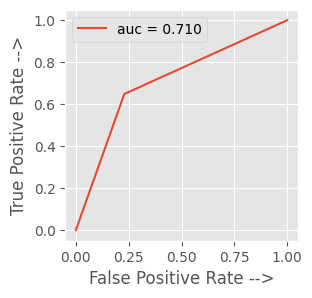

[[118  26]
 [ 25  49]]
Accuracy score: 0.7660550458715596
Precision score: 0.6533333333333333
Sensitivity score: 0.6621621621621622
Specificity score: 0.8194444444444444


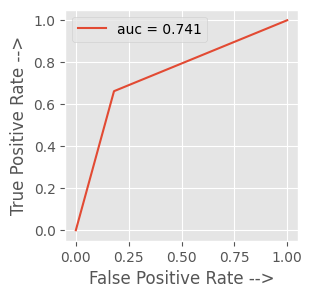

In [39]:
# Run the models on scaled data from X and X2 and use the classification reports to determine which is the best one
model(lr, X_train_sc, X_test_sc, Y_train, Y_test)
model(KNN, X_train_sc, X_test_sc, Y_train, Y_test)
model(dt, X_train_sc, X_test_sc, Y_train, Y_test)
model(rf, X_train_sc, X_test_sc, Y_train, Y_test)
model(nb, X_train_sc, X_test_sc, Y_train, Y_test)
model(svec, X_train_sc, X_test_sc, Y_train, Y_test)

[[116  28]
 [ 25  49]]
Accuracy score: 0.7568807339449541
Precision score: 0.6363636363636364
Sensitivity score: 0.6621621621621622
Specificity score: 0.8055555555555556


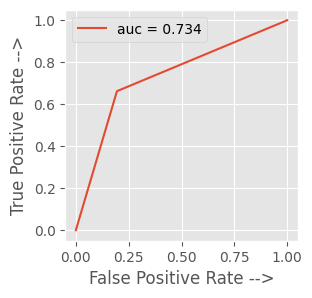

[[109  35]
 [ 33  41]]
Accuracy score: 0.6880733944954128
Precision score: 0.5394736842105263
Sensitivity score: 0.5540540540540541
Specificity score: 0.7569444444444444


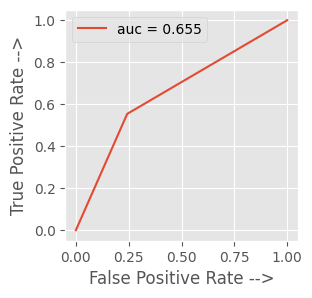

[[101  43]
 [ 28  46]]
Accuracy score: 0.6743119266055045
Precision score: 0.5168539325842697
Sensitivity score: 0.6216216216216216
Specificity score: 0.7013888888888888


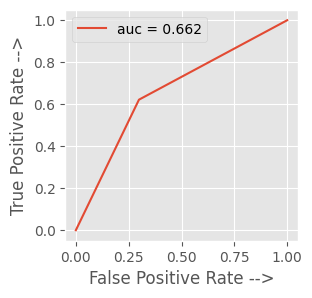

[[117  27]
 [ 25  49]]
Accuracy score: 0.7614678899082569
Precision score: 0.6447368421052632
Sensitivity score: 0.6621621621621622
Specificity score: 0.8125


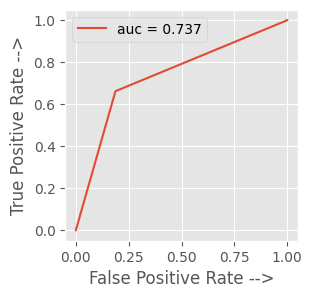

[[110  34]
 [ 23  51]]
Accuracy score: 0.7385321100917431
Precision score: 0.6
Sensitivity score: 0.6891891891891891
Specificity score: 0.7638888888888888


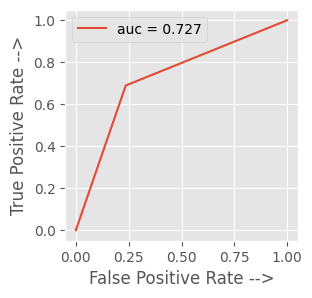

[[118  26]
 [ 26  48]]
Accuracy score: 0.7614678899082569
Precision score: 0.6486486486486487
Sensitivity score: 0.6486486486486487
Specificity score: 0.8194444444444444


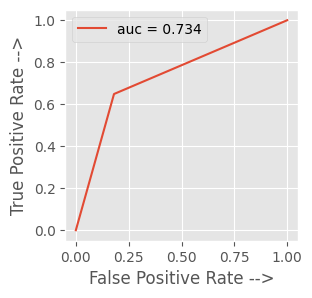

In [40]:
model(lr, X2_train_sc, X2_test_sc, Y2_train, Y2_test)
model(KNN, X2_train_sc, X2_test_sc, Y2_train, Y2_test)
model(dt, X2_train_sc, X2_test_sc, Y2_train, Y2_test)
model(rf, X2_train_sc, X2_test_sc, Y2_train, Y2_test)
model(nb, X2_train_sc, X2_test_sc, Y2_train, Y2_test)
model(svec, X2_train_sc, X2_test_sc, Y2_train, Y2_test)

Based on the results from the 12 classification reports, we can determine that either Support Vector Machine or the Random Forest model is best suited for the data in X (with Insulin data) and the Random Forest model is best suited in X2 (no insulin data). Out of the 2 Random Forest models, the one using X performs the best with its best results being an Accuracy of 79.8%, Precision of 70.3%, Sensitivity of 70.3%, Specificity of 84.7%, and AUC of 0.775.

In [36]:
#compression_opts = dict(method='zip',
#                        archive_name='diabetes.csv')  
#df.to_csv('diabetes.zip', index=False,
#          compression=compression_opts) 

In [37]:
#compression_opts = dict(method='zip',
#                        archive_name='df_corr.csv')  
#df_corr.to_csv('df_corr.zip', index=False,
#          compression=compression_opts) 